# Part 2 Question 1

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

2023-12-09 11:10:38.632996: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
My_NN_Model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation = 'sigmoid', input_shape = (4,)),
    tf.keras.layers.Dense(3, activation = 'relu'),
    tf.keras.layers.Dense(3,activation = 'softmax')
])


In [16]:
My_NN_Model.compile(loss = 'categorical_cross_entropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
My_NN_Model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 3)                 15        
                                                                 
 dense_13 (Dense)            (None, 3)                 12        
                                                                 
Total params: 47 (188.00 Byte)
Trainable params: 47 (188.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Part 2 Question 2

In [20]:
CNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=2, kernel_size=(3,3), input_shape=(30,30,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [21]:
CNN.compile(loss = 'categorical_cross_entropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
CNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 2)         20        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 2)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 4)         76        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 4)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 196)               0         
                                                                 
 dense_15 (Dense)            (None, 3)                

# Question 3


In [197]:
data = pd.read_csv('Final_News_DF_Labeled_ExamDataset.csv')

In [198]:
def min_max_normalization(X_):
    for index, row in enumerate(X_):
        #print(index,row)
        max_ = np.max(row)
        min_ = np.min(row)
        print(max_, min_)
        row_ = (row - min_) / (max_ - min_)
        X_[index] = row_
    return X_

In [240]:
def display_confusion(prediction, truth, labels,L, name):
    cm = confusion_matrix(truth, prediction, labels=labels)
    fig, ax = plt.subplots(figsize = (9,9)) 
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
    ax.set_xlabel('Predicted labels') 
    ax.set_ylabel('True labels')
    ax.set_title('Predicting Journal Topics: ' + name)
    ax.xaxis.set_ticklabels(L)
    ax.yaxis.set_ticklabels(L,rotation=0)
    plt.show()
def display_history(History, name):
    plt.plot(History.history['accuracy'], label='accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([-0.1, 1])
    plt.legend(loc='lower right')
    plt.xlim(0, 10) 
    plt.locator_params(axis='x', nbins=10) 
    plt.title(name)
    plt.show()
def shuffle_order(a,b):
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [301]:
Y = np.array(data.loc[:,'LABEL'])
X = []
for category in data:
    if category == 'LABEL':
        continue
    X.append(data[category])
X = np.array(X).T
x,y = shuffle_order(X,Y)
labels = ['politics', 'science', 'football']


In [302]:
#make y into one hot
mapping = {}
for topic in range(len(label)):
    mapping[label[topic]] = topic
print(mapping)
for index, journal in enumerate(y):
    y[index] = mapping[journal]
print(y)
y_one_hot = tf.keras.utils.to_categorical(y)
print(y_one_hot)
        

{'politics': 0, 'science': 1, 'football': 2}
[1 0 2 ... 1 0 2]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [278]:
print('x is ', x.shape)
print('y (in one-hot) is ', y_one_hot.shape)

x is  (1493, 300)
y (in one-hot) is  (1493, 3)


In [279]:
print(len(x[0]))
print(x[0])
print(y_one_hot)

300
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [303]:
x_test = x[0:200]
y_test = y_one_hot[0:200]
x_train = x[200:]
y_train = y_one_hot[200:]


In [328]:
RNN_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(units = 100, input_shape = (300,1)),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
RNN_model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_26 (SimpleRNN)   (None, 100)               10200     
                                                                 
 dense_53 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10503 (41.03 KB)
Trainable params: 10503 (41.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [320]:
loss_function = keras.losses.CategoricalCrossentropy()
RNN_model.compile(
                 loss=loss_function,
                 metrics=["accuracy"],
                 optimizer='adam'
                 )

In [321]:
RNN_history = RNN_model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
41/41 [==============================] - 3s 43ms/step - loss: 1.0991 - accuracy: 0.3589
Epoch 2/10
41/41 [==============================] - 2s 44ms/step - loss: 1.0978 - accuracy: 0.3465
Epoch 3/10
41/41 [==============================] - 2s 44ms/step - loss: 1.0872 - accuracy: 0.3596
Epoch 4/10
41/41 [==============================] - 2s 43ms/step - loss: 1.0731 - accuracy: 0.3952
Epoch 5/10
41/41 [==============================] - 2s 43ms/step - loss: 1.0669 - accuracy: 0.4045
Epoch 6/10
41/41 [==============================] - 2s 43ms/step - loss: 1.1014 - accuracy: 0.3782
Epoch 7/10
41/41 [==============================] - 2s 43ms/step - loss: 1.0860 - accuracy: 0.3782
Epoch 8/10
41/41 [==============================] - 2s 43ms/step - loss: 1.0913 - accuracy: 0.3813
Epoch 9/10
41/41 [==============================] - 2s 44ms/step - loss: 1.0942 - accuracy: 0.3681
Epoch 10/10
41/41 [==============================] - 2s 47ms/step - loss: 1.0940 - accuracy: 0.3666


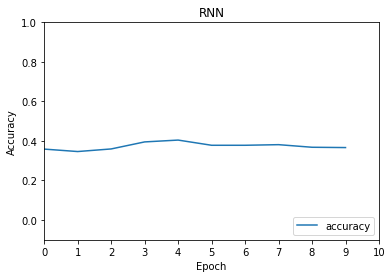

In [322]:
display_history(RNN_history, name='RNN')

In [323]:
predictions = RNN_model.predict([x_test])
print(predictions)

7/7 [==============================] - 0s 16ms/step
[[0.5165466  0.27527368 0.20817976]
 [0.32972163 0.36444116 0.30583715]
 [0.3242651  0.3692362  0.3064987 ]
 [0.30709893 0.34724173 0.34565932]
 [0.3469445  0.3255264  0.32752907]
 [0.34021926 0.34490544 0.31487527]
 [0.31520402 0.3826494  0.30214652]
 [0.34361732 0.33513197 0.32125074]
 [0.34333524 0.33598596 0.32067877]
 [0.3375224  0.351302   0.31117564]
 [0.33993286 0.3456476  0.31441954]
 [0.34491137 0.33124268 0.32384592]
 [0.34108862 0.34256077 0.31635055]
 [0.34495676 0.3205859  0.33445728]
 [0.46650845 0.28920326 0.24428824]
 [0.336747   0.352907   0.31034598]
 [0.33926234 0.34755763 0.31318   ]
 [0.3419568  0.34009203 0.3179512 ]
 [0.3388222  0.3483816  0.31279618]
 [0.3427784  0.33766338 0.31955826]
 [0.34108862 0.34256077 0.31635055]
 [0.33715877 0.35206982 0.3107713 ]
 [0.34655052 0.32658106 0.3268684 ]
 [0.46650845 0.28920326 0.24428824]
 [0.30108228 0.32434925 0.3745684 ]
 [0.3563224  0.31442884 0.3292487 ]
 [0.34416872

In [324]:
for index, predict in enumerate(predictions):
    predictions[index] = np.where(predict == max(predict), 1, 0)


In [325]:
print(predictions)
P = []
for predict in predictions:
    P.append(np.argmax(predict))
print(P)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [326]:
y_test_P = []
for y in y_test:
    y_test_P.append(np.argmax(y))
print(y_test_P)

[1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1]


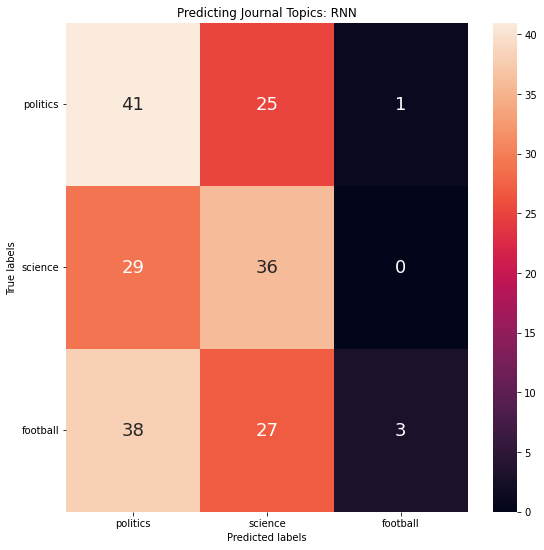

In [327]:
display_confusion(P, y_test_P, labels = [0,1,2], L = labels, name='RNN')

In [214]:
LSTM_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 100, input_shape = (300,1)),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
LSTM_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_27 (Dense)            (None, 3)                 303       
                                                                 
Total params: 41103 (160.56 KB)
Trainable params: 41103 (160.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [215]:
LSTM_model.compile(
                 loss=loss_function,
                 metrics=["accuracy"],
                 optimizer='adam'
)

In [216]:
LSTM_history = LSTM_model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
41/41 [==============================] - 8s 146ms/step - loss: 1.0961 - accuracy: 0.3666
Epoch 2/10
41/41 [==============================] - 6s 155ms/step - loss: 1.0886 - accuracy: 0.3852
Epoch 3/10
41/41 [==============================] - 6s 149ms/step - loss: 1.0848 - accuracy: 0.3998
Epoch 4/10
41/41 [==============================] - 6s 142ms/step - loss: 1.0912 - accuracy: 0.4354
Epoch 5/10
41/41 [==============================] - 6s 142ms/step - loss: 1.0857 - accuracy: 0.4277
Epoch 6/10
41/41 [==============================] - 6s 143ms/step - loss: 1.0769 - accuracy: 0.4277
Epoch 7/10
41/41 [==============================] - 7s 175ms/step - loss: 1.0556 - accuracy: 0.4462
Epoch 8/10
41/41 [==============================] - 6s 144ms/step - loss: 1.0375 - accuracy: 0.4640
Epoch 9/10
41/41 [==============================] - 6s 142ms/step - loss: 1.0192 - accuracy: 0.4687
Epoch 10/10
41/41 [==============================] - 7s 162ms/step - loss: 1.0400 - accuracy: 0.4679

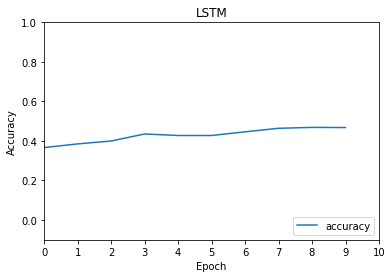

In [243]:
display_history(LSTM_history, name='LSTM')

In [218]:
LSTM_predictions = LSTM_model.predict([x_test])
print(LSTM_predictions)

7/7 [==============================] - 1s 46ms/step
[[0.28769886 0.37217546 0.34012577]
 [0.28910106 0.37012497 0.3407739 ]
 [0.24567981 0.42050347 0.33381677]
 [0.2878585  0.3719292  0.34021237]
 [0.29051915 0.16779275 0.54168814]
 [0.19555034 0.11536571 0.68908393]
 [0.28769737 0.37217763 0.34012502]
 [0.29193357 0.36167753 0.34638897]
 [0.28647822 0.37393764 0.339584  ]
 [0.2998502  0.30615467 0.3939952 ]
 [0.2878105  0.3720064  0.34018305]
 [0.2876579  0.37223673 0.34010538]
 [0.4509055  0.2439276  0.30516696]
 [0.28769886 0.37217546 0.34012577]
 [0.28788444 0.37188593 0.34022972]
 [0.73637545 0.11347438 0.15015022]
 [0.31678694 0.33250788 0.35070515]
 [0.28899702 0.37027857 0.3407244 ]
 [0.3352969  0.45166987 0.21303317]
 [0.4593091  0.23959143 0.30109957]
 [0.959842   0.0205406  0.01961734]
 [0.959842   0.0205406  0.01961734]
 [0.46734816 0.24805647 0.2845954 ]
 [0.23480326 0.44600496 0.3191917 ]
 [0.2929847  0.33840767 0.36860758]
 [0.2865815  0.3737398  0.3396786 ]
 [0.46936995

In [220]:
for index, predict in enumerate(LSTM_predictions):
    LSTM_predictions[index] = np.where(predict == max(predict), 1, 0)


In [221]:
print(LSTM_predictions)
LSTM_P = []
for predict in LSTM_predictions:
    LSTM_P.append(np.argmax(predict))
print(LSTM_P)


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0.

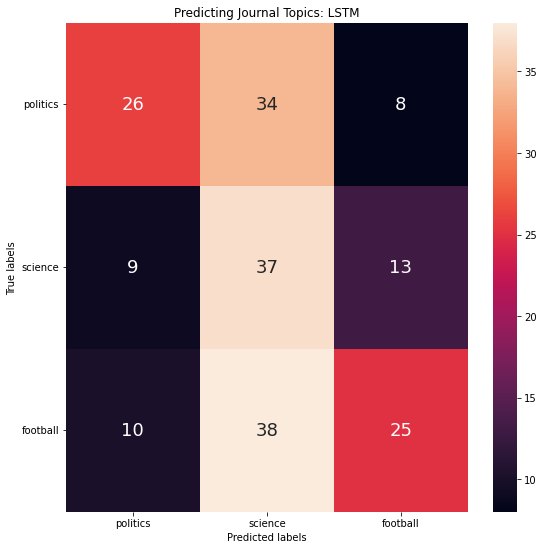

In [244]:
display_confusion(LSTM_P, y_test_P, labels = [0,1,2], L = labels, name='LSTM')

In [227]:
CNN_model = tf.keras.models.Sequential([
      
  tf.keras.layers.Conv1D(50, kernel_size=3, activation='relu', input_shape = (300,1)),
  tf.keras.layers.MaxPool1D(pool_size=2),
  
  tf.keras.layers.Conv1D(40, kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool1D(pool_size=2),
  
  tf.keras.layers.Conv1D(30, kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPool1D(pool_size=2),
  
  tf.keras.layers.Flatten(),
 
  tf.keras.layers.Dense(30),
  tf.keras.layers.Dropout(0.5),
 
  tf.keras.layers.Dense(3, activation="softmax")

])
CNN_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 298, 50)           200       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 149, 50)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 147, 40)           6040      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 73, 40)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 71, 30)            3630      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 35, 30)          

In [228]:
CNN_model.compile(
                 loss=loss_function,
                 metrics=["accuracy"],
                 optimizer='adam'
)

In [229]:
CNN_history = CNN_model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
41/41 [==============================] - 2s 20ms/step - loss: 1.0011 - accuracy: 0.4834
Epoch 2/10
41/41 [==============================] - 1s 22ms/step - loss: 0.8130 - accuracy: 0.6203
Epoch 3/10
41/41 [==============================] - 1s 20ms/step - loss: 0.7199 - accuracy: 0.6721
Epoch 4/10
41/41 [==============================] - 1s 21ms/step - loss: 0.6576 - accuracy: 0.7100
Epoch 5/10
41/41 [==============================] - 1s 18ms/step - loss: 0.6076 - accuracy: 0.7386
Epoch 6/10
41/41 [==============================] - 1s 24ms/step - loss: 0.5636 - accuracy: 0.7641
Epoch 7/10
41/41 [==============================] - 1s 17ms/step - loss: 0.5446 - accuracy: 0.7726
Epoch 8/10
41/41 [==============================] - 1s 18ms/step - loss: 0.5110 - accuracy: 0.7788
Epoch 9/10
41/41 [==============================] - 1s 18ms/step - loss: 0.5023 - accuracy: 0.7842
Epoch 10/10
41/41 [==============================] - 1s 18ms/step - loss: 0.4798 - accuracy: 0.7927


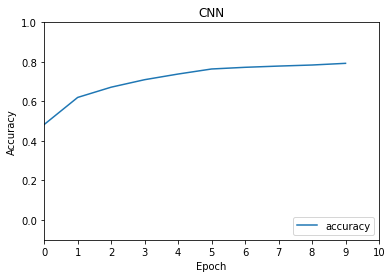

In [245]:
display_history(CNN_history, name='CNN')

In [231]:
CNN_predictions = CNN_model.predict([x_test])
print(predictions)

7/7 [==============================] - 0s 5ms/step
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 

In [232]:
for index, predict in enumerate(CNN_predictions):
    CNN_predictions[index] = np.where(predict == max(predict), 1, 0)


In [233]:
print(CNN_predictions)
CNN_P = []
for predict in CNN_predictions:
    CNN_P.append(np.argmax(predict))
print(CNN_P)


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0.

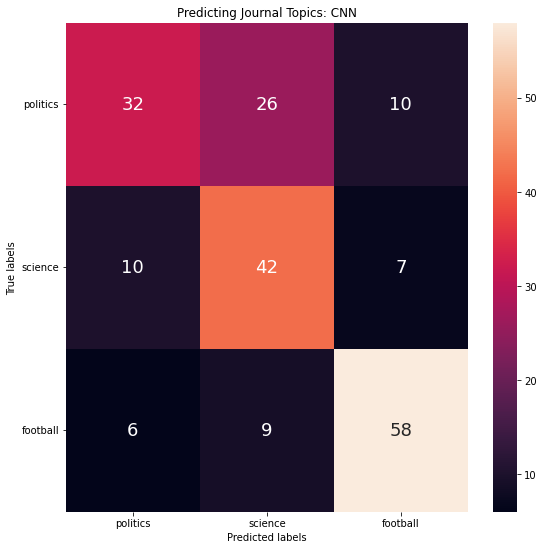

In [246]:
display_confusion(CNN_P, y_test_P, labels = [0,1,2], L = labels, name = 'CNN')